In [1]:
# importamos las librerias necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Cargamos los datos desde el archivo CSV
data = ("synthetic_health_data.csv")
df = pd.read_csv(data)
df

,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption,Health_Score
0,45.960570,31.996777,5,55.403270,7.300359,0,2.834707,70.542122
1,38.340828,29.623168,6,41.838357,7.012419,1,7.199517,57.244637
2,47.772262,25.298152,5,76.904948,6.028641,1,4.097944,96.333722
3,58.276358,21.765316,2,49.756767,5.802714,1,3.649377,61.321783
4,37.190160,28.491117,2,44.218737,7.912548,0,2.839795,67.175894
...,...,...,...,...,...,...,...,...
995,36.626796,30.350751,1,60.674477,8.470913,0,3.823116,67.993747
996,61.572238,24.867394,3,66.527725,5.355398,1,5.597395,72.377621
997,47.690114,20.590627,4,69.819819,8.641864,0,8.195167,100.000000
998,33.145852,24.184665,6,70.724204,7.941557,0,3.676134,100.000000


In [3]:
df.columns

Index(['Age', 'BMI', 'Exercise_Frequency', 'Diet_Quality', 'Sleep_Hours',
       'Smoking_Status', 'Alcohol_Consumption', 'Health_Score'],
      dtype='object')

In [4]:
# verificamos si tenemos valores nulos en las columnas del dataframe
df.isnull().sum()

Age                    0
BMI                    0
Exercise_Frequency     0
Diet_Quality           0
Sleep_Hours            0
Smoking_Status         0
Alcohol_Consumption    0
Health_Score           0
dtype: int64

In [5]:
# obtenemos las variables tanto dependientes como independientes
x = df[["Age", "BMI", "Exercise_Frequency", "Diet_Quality", "Sleep_Hours", "Smoking_Status", "Alcohol_Consumption"]]
y = df["Health_Score"]

In [6]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
# Creamos y entrenamos el modelo de Regresion Lineal
model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [8]:
# hacemos las predicciones
predicciones = model.predict(x_test)
predicciones

array([ 81.86299946,  97.79214462,  85.1878406 ,  81.04964734,
       106.80936269,  81.31970194,  87.66139566,  97.97039051,
        93.95853659,  88.39102787, 109.92593215,  72.16122188,
       103.98927647, 100.26081212,  68.38066723,  89.17195324,
        56.91142356,  82.98522358,  85.20605732, 116.73539334,
        75.07820324,  91.22483668,  73.74135635,  70.62702648,
       111.63450663,  71.52300741, 107.01082118,  50.22788087,
        97.05417559,  76.23281559,  91.99154787,  76.39646775,
        83.15903185,  83.7928589 , 103.01982443, 101.35873357,
        69.97627494,  85.32358617,  97.20766961, 109.61219629,
        90.73943962,  84.20907417,  90.65787155,  91.89570628,
       111.00742519,  75.12475869,  57.82780407,  78.56837751,
        90.32267694,  73.97270795,  94.55227204,  69.85067626,
        80.53061413, 101.08527128,  86.85491487, 104.89753887,
        89.98831496,  82.20777178,  91.82510139,  82.64574204,
        79.54116997,  83.95381974,  86.31566421,  66.52

In [9]:
# Calculamos las métricas de evaluación del modelo (MSE y R²)
mse = mean_squared_error(y_test, predicciones)
r2 = r2_score(y_test, predicciones)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 37.24188275726835
R² Score: 0.8089785388412886


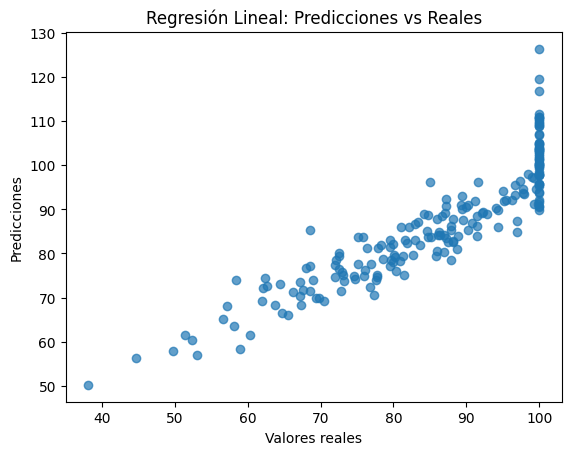

In [10]:
# Visualizar las predicciones frente a los valores reales
plt.scatter(y_test, predicciones, alpha=0.7)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal: Predicciones vs Reales")
plt.show()


In [11]:
# Mostramos los coeficientes de las variables independientes y el intercepto
coefficients = pd.DataFrame({'Feature': x.columns, 'Coefficient': model.coef_})
print(coefficients)

print(f"Intercept: {model.intercept_}")


               Feature  Coefficient
0                  Age    -0.225382
1                  BMI    -1.170027
2   Exercise_Frequency     1.792930
3         Diet_Quality     0.606128
4          Sleep_Hours     2.519030
5       Smoking_Status    -3.830109
6  Alcohol_Consumption    -1.030223
Intercept: 64.39646260269849
